## Relativistic Particle Orbits
### Ken Sible | December 13, 2018 | PHYS 301 Final Project
*For the relativistic tensor equations associated with spacetime orbits, the constants are expressed using geometrized units*

### Newtonian Particle Orbits
The classical Newtonian system for the particle with mass $m$ orbiting the fixed central mass $M$ has the following Lagrangian $$\mathcal{L}=\frac{1}{2}m\dot{\textbf{r}}^2+\frac{GMm}{r}=\frac{1}{2}m(\dot{r}^2+r^2\dot{\phi}^2)+\frac{GMm}{r}$$ The differential equations obtained from applying the Euler-Lagrange equations for the two degrees of freedom, $r$ and $\phi$, are
\begin{align}
\frac{\partial\mathcal{L}}{\partial\phi}&=\frac{d}{dt}\frac{\partial\mathcal{L}}{\partial\dot{\phi}}\Rightarrow mr^2\dot{\phi}=const=l\\
\frac{\partial\mathcal{L}}{\partial r}&=\frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{r}}\Rightarrow m\ddot{r}=mr\dot{\phi}^2-\frac{GMm}{r^2}
\end{align}
The coordinate $\phi$ was ignorable, meaning that the conjugate momentum, $l=mr^2\dot{\phi}^2$, was conserved. The initial conditions determine the constant $l$ (angular momentum); therefore, we can eliminate $\dot{\phi}$ in the radial equation
$$m\ddot{r}=\frac{l^2}{mr^3}-\frac{GMm}{r^2}=-\frac{d}{dr}\left(\frac{l^2}{2mr^2}-\frac{GMm}{r}\right)=-\frac{dU_{eff}}{dr}$$
The effective potential energy contains the gravitational potential energy and the (fictitious) centrifugal potential energy
$$U_{eff}(r)=\frac{l^2}{2mr^2}-\frac{GMm}{r}$$
The radial equation depends upon the time parameter, $r=r(t)$, while the orbital equation, $r=r(\phi)$, depends upon the azimuthal parameter. The orbital equation follows from the radial equation with the change of variables $r\rightarrow u^{-1}$ and $t\rightarrow\phi$
\begin{align}
\frac{d}{dt}&=\frac{d\phi}{dt}\frac{d}{d\phi}=\frac{l}{mr^2}\frac{d}{d\phi}=\frac{lu^2}{m}\frac{d}{d\phi}\\
\dot{r}&=\frac{dr}{dt}=\frac{lu^2}{m}\frac{d}{d\phi}\left(\frac{1}{u}\right)=-\frac{l}{m}\frac{du}{d\phi}\\
\ddot{r}&=\frac{d\dot{r}}{dt}=\frac{lu^2}{m}\frac{d}{d\phi}\left(\frac{l}{m}\frac{du}
{d\phi}\right)=-\frac{l^2u^2}{m^2}\frac{d^2u}{d\phi^2}
\end{align}
$$\Rightarrow \frac{d^2u}{d\phi^2}=-u(\phi)+\frac{m}{l^2u(\phi)^2}\frac{GMm}{r^2}=-u(\phi)+GM\left(\frac{m}{l}\right)^2$$


In [1]:
from numpy import linspace, array, zeros, sqrt, cos, sin, pi
from matplotlib import pyplot as plt

def RK4(x0, f0, df, dx, *args):
    k1 = df(x0, f0, *args)
    k2 = df(x0 + dx/2, f0 + dx*k1/2, *args)
    k3 = df(x0 + dx/2, f0 + dx*k2/2, *args)
    k4 = df(x0 + dx, f0 + dx*k3, *args)
    return f0 + dx*(k1 + 2*k2 + 2*k3 + k4)/6

def odeint(df, xspan, f0, dx, *args):
    N = int((xspan[1] - xspan[0])/dx) + 1
    x = linspace(xspan[0], xspan[1], N)
    f = zeros((len(f0), N))
    f[:, 0] = f0 # Initial Condition
    for i in range(N - 1):
        f[:, i + 1] = RK4(x[i], f[:, i], df, dx, *args)
    return x, f

G, c = 6.67e-11, 3e8   # Gravitational Constant/Speed of Light [SI Units]

<IPython.core.display.Javascript object>


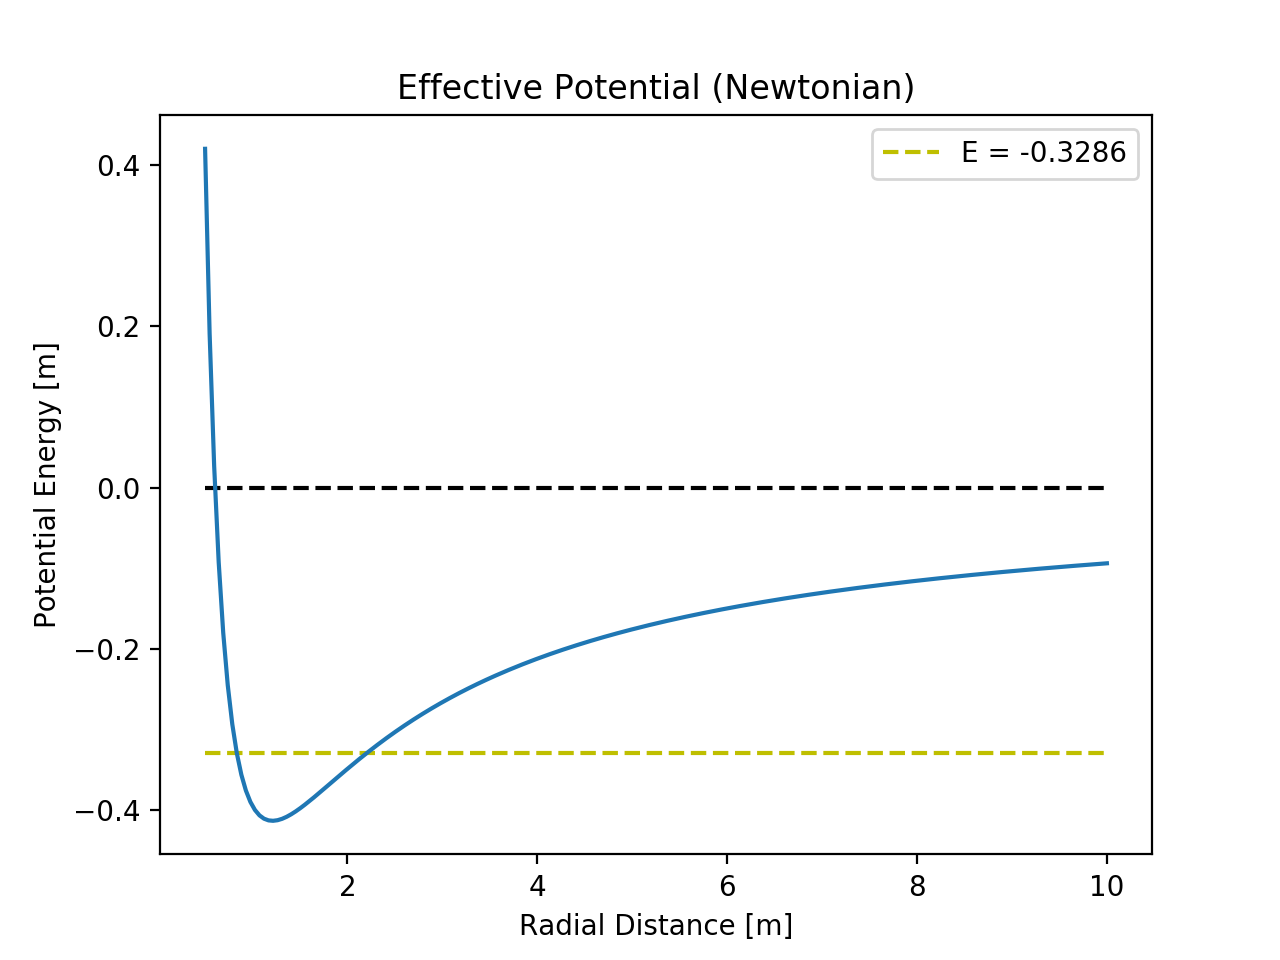

In [2]:
% matplotlib notebook
M = m = 1       # Stellar/Planetary Mass [m]
l = 1.1         # Orbital Angular Momentum [m^2]
r0 = l**2 + 1   # Initial Radial Position [m]
v0 = 0.0        # Initial Radial Velocity

def Un(r): return l**2/(2*m*r**2) - M*m/r   # Newtonian Potential Energy

r = linspace(0.5, 10, 200)
E = [m*(v0**2)/2 + Un(r0) for i in range(200)]
plt.title('Effective Potential (Newtonian)')
plt.xlabel('Radial Distance [m]')
plt.ylabel('Potential Energy [m]')
plt.plot(r, zeros(200), 'k--')
plt.plot(r, E, 'y--', label=f'E = {round(E[0], 4)}')
plt.plot(r, Un(r)); plt.legend();

<IPython.core.display.Javascript object>


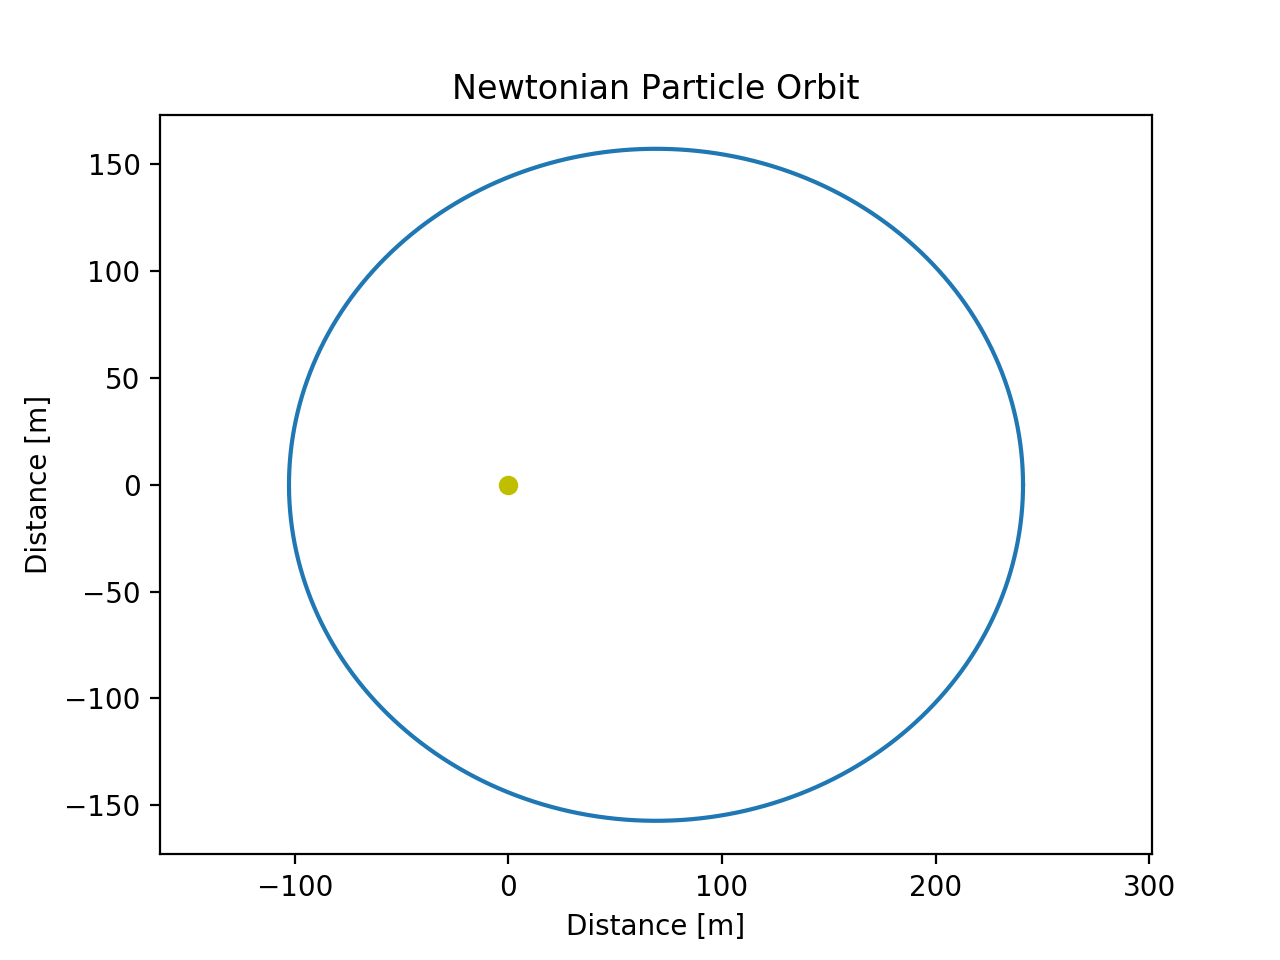

Total Energy: -0.0029101817043772856


In [3]:
% matplotlib notebook
M = m = 1       # Stellar, Planetary Mass [m]
l = 12.0        # Orbital Angular Momentum [m^2]
rc = 6/(1 - sqrt(1 - 12/l**2)) # (Schwarzschild Stable)
r0 = rc + 100   # Initial Radial Position [m]
v0 = 0.0        # Initial Radial Velocity

# M = 2e30*G/c**2        # Stellar Mass [m]
# m = 3.3e23*G/c**2      # Mercury Mass [m]
# r0 = 69.8e9            # Mercury Orbital Radius [m] (Aphelion)
# l = 9.1e38*G/c**3      # Mercury Angular Momentum [m^2]

def Un(r): return l**2/(2*m*r**2) - M*m/r   # Newtonian Potential Energy

def du(x, u): return array([u[1], M*(m/l)**2 - u[0]])
phi, u = odeint(du, (0, 2*pi), [1/r0, v0], 0.001)
r = [abs(1/i) for i in u[0, :]] # Radial Coordinate
x = [r[i]*cos(phi[i]) for i in range(len(r))]
y = [r[i]*sin(phi[i]) for i in range(len(r))]
plt.axis('equal'); plt.plot(0, 0, 'yo')
plt.title('Newtonian Particle Orbit')
plt.xlabel('Distance [m]'); plt.ylabel('Distance [m]')
plt.plot(x, y)

print(f'Total Energy: {m*(v0**2)/2 + Un(r0)}');
# {E < 0} Circle, {E < 0} Ellipse, {E = 0} Parabola, {E > 0} Hyperbola

### Schwarzschild Particle Orbits
The Schwarzschild metric characterizes the spacetime geometry outside static, spherically-symmetric mass sources, such as non-rotating black holes, neutron stars, and other stellar sources.
$$ds^2=-\left(1-\frac{2M}{r}\right)dt^2+\left(1-\frac{2M}{r}\right)^{-1}dr^2+r^2\left(d\theta^2+sin^2\theta\,d\phi^2\right)$$
The conserved quantities for this metric follow from the $t$, $\phi$ coordinate independence of the metric coefficents. The geodesic equation, with proper time as the affine parameter, describes the trajectory for freely-falling particles.
$$\frac{d^2x^\mu}{d\tau^2}+\Gamma^{\mu}_{\hphantom{\mu}\alpha\beta}\frac{dx^\alpha}{d\tau}\frac{dx^\beta}{d\tau}=0$$
The alternative geodesic equation, derived from the principle of least action, makes explicit the conserved quantities 
$$\mathcal{L}=\frac{1}{2}g_{\mu\nu}dx^\mu dx^\nu$$
$$\frac{d}{d\tau}\left(g_{\mu\nu}\frac{dx^\nu}{d\tau}\right)-\frac{1}{2}g_{\alpha\beta,\mu}\frac{dx^\alpha}{d\tau}\frac{dx^\beta}{d\tau}=0$$
For the $\mu=t$ and $\mu=\phi$ components of the geodesic equation, the conserved quantities are denoted as $e$ and $l$
$$\frac{d}{d\tau}\left(g_{t\nu}\frac{dx^\nu}{d\tau}\right)-\frac{1}{2}g_{\alpha\beta,t}\frac{dx^\alpha}{d\tau}\frac{dx^\beta}{d\tau}=0$$
$$\frac{d}{d\tau}\left(g_{tt}\frac{dt}{d\tau}\right)=0\Rightarrow \left(1-\frac{2GM}{r}\right)\frac{dt}{d\tau}=const\equiv e$$

$$\frac{d}{d\tau}\left(g_{\phi\nu}\frac{dx^\nu}{d\tau}\right)-\frac{1}{2}g_{\alpha\beta,\phi}\frac{dx^\alpha}{d\tau}\frac{dx^\beta}{d\tau}=0$$
$$\frac{d}{d\tau}\left(g_{\phi\phi}\frac{dt}{d\tau}\right)=0\Rightarrow r^2sin^2\theta\frac{d\phi}{d\tau}=const\equiv l$$
The appendix contains the detailed derivation, from both geodesic equations, for the conserved quantities $e$ and $l$. The mathematical formalism from differential geometry for obtaining conserved quantities manifests itself through isometries on manifolds and their associated Killing vectors.

The interpretation for the conserved quantity $e$ comes from taking the limit as $r\rightarrow\infty$ where $e$ reduces to $dt/d\tau$, i.e. the relativistic energy per unit mass ($p^t/m=dt/d\tau$). The interpretation for the conserved quantity $l$ comes from setting $\theta=\pi/2$ (equatorial plane) where $l$ reduces to $r^2(d\phi/d\tau)$, i.e. the relativistic angular momentum per unit mass (recall from classical mechanics that $l/m=r^2\omega$). The conjecture that an orbital trajectory in the equatorial plane remains in that plane follows from the $\mu=\theta$ component of the geodesic equation since $d^2\theta/d\tau^2=0$ when $d\theta/d\tau=0$ and $\theta=\pi/2$. The conservation of angular momentum provides the physical interpretation for trajectories remaining in the equatorial plane.

The geodesic equation obtained from the normalization of four-velocity, $g_{\mu\nu}u^\mu u^\nu=-1$, with the substitutions for $e$ and $l$, identifies the effective kinetic and potential energies (per unit mass) for the orbital trajectory
$$\frac{1}{2}\left(e^2-1\right)=\frac{1}{2}\left(\frac{dr}{d\tau}\right)^2-\frac{M}{r}+\frac{l^2}{2r^2}-\frac{Ml^2}{r^3}\equiv \tilde{E}=\tilde{K}+\tilde{V}(r)$$
$$\tilde{V}(r)=-\frac{M}{r}+\frac{l^2}{2r^2}-\frac{Ml^2}{r^3}$$
The radial geodesic equation conveniently follows from taking the $\tau$-derivative of the total effective energy equation
$$\frac{d^2r}{d\tau^2}=-\frac{M}{r^2}+\frac{l^2}{r^3}-\frac{3Ml^2}{r^4}$$
The Schwarzschild radial equation deviates from the Newtonian radial equation by the ~$r^{-4}$ term. The orbital equation follows from the radial equation with the change of variables $r\rightarrow u^{-1}$ and $t\rightarrow\phi$, same as the Newtonian orbital equation
$$\frac{du^2}{d\phi^2}=-u(\phi)+\frac{M}{l^2}+3M[u(\phi)]^2$$

For deriving the orbital precession (perhelion advance), consider the circular orbit perturbation $u(\phi)=u_c+w(\phi)u_c$
$$\frac{du_c^2}{d\phi^2}=-u_c+\frac{M}{l^2}+3Mu_c^2\Rightarrow u_c=\frac{M}{l^2}+3Mu_c^2$$
\begin{align}
\frac{d^2w}{d\phi^2}u_c&=-(u_c+wu_c)+\frac{M}{l^2}+3M(u_c+wu_c)^2\\
&=-u_c-wu_c+u_c-3Mu_c^2+3Mu_c^2(1+w)^2\\
&=-wu_c-3Mu_c^2+3Mu_c^2(1+2w+w^2)\\
&=-wu_c+6Mu_c^2w+3Mu_c^2w^2\\
&=-wu_c+6Mu_c^2w\\
\frac{d^2w}{d\phi^2}&=-(1+6Mu_c)w
\end{align}
The $O(w^2)$ terms were dropped since the assumption $w(\phi)<<1$ implies that only linear terms are considered. The perturbation equation for $w(\phi)$ mirrors the harmonic oscillator equation with $\omega^2=1-6Mu_c$ and known solution given as $w(\phi)=A\cos{(\omega\phi+\phi_0)}$. The perihelion occurs when $\omega\phi+\phi_0=\pi+2\pi n$ since that constraint minimizes $w(\phi)$.
\begin{align}
\omega\Delta\phi=2\pi&\Rightarrow\Delta\phi=2\pi(1-6Mu_c)^{-1/2}\\
&\Rightarrow\Delta\phi\approx 2\pi(1+3Mu_c)\\
&\Rightarrow\Delta\phi\approx 2\pi+\frac{6\pi M}{r_c}\\
\end{align}
The binomial expansion was used for approximation since $6Mu_c<<1$ for large $r_c$. The expression for $\Delta\phi$ implies that the sucessive perihelions in the precession occur $6\pi M/r_c$ radians after the angular coordinate traverses the orbit once.

<IPython.core.display.Javascript object>


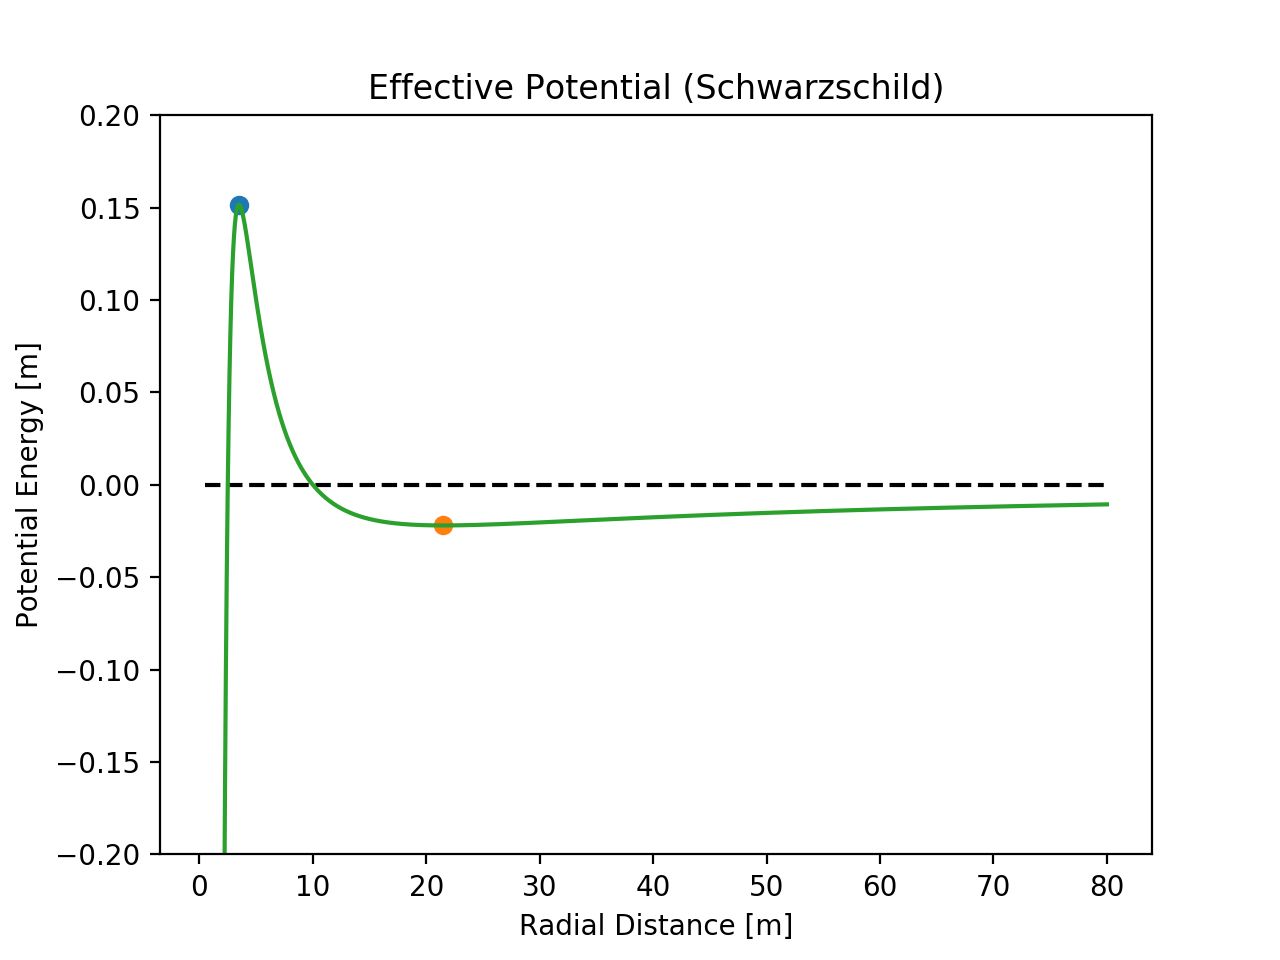

In [4]:
% matplotlib notebook
M = m = 1       # Stellar/Planetary Mass [m]
l = 5           # Orbital Angular Momentum [m^2]
r = linspace(0.5, 80, 1000)
plt.title('Effective Potential (Schwarzschild)')
plt.xlabel('Radial Distance [m]')
plt.ylabel('Potential Energy [m]')
plt.ylim((-0.2, 0.2))
plt.plot(r, zeros(1000), 'k--')
def U(r): return l**2/(2*r**2) - 1/r - l**2/r**3;   # Schwarzschild Potential Energy
plt.plot(6*M/(1 + sqrt(1 - 12*M**2/l**2)), U(6*M/(1 + sqrt(1 - 12*M**2/l**2))), 'o')
plt.plot(6*M/(1 - sqrt(1 - 12*M**2/l**2)), U(6*M/(1 - sqrt(1 - 12*M**2/l**2))), 'o')
plt.plot(r, U(r));

<IPython.core.display.Javascript object>


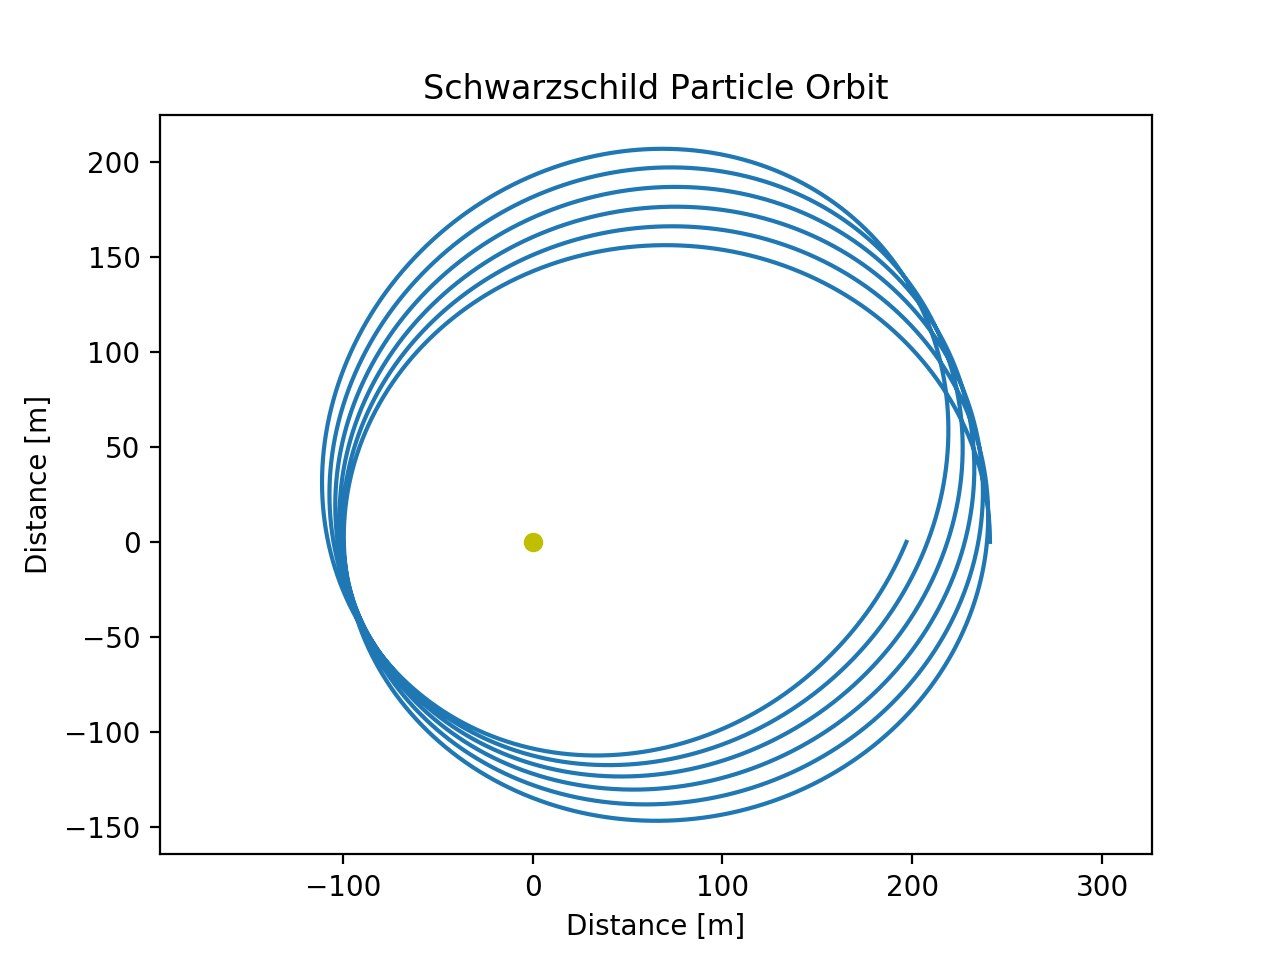

Total Energy: -0.0029307734967186925


In [5]:
% matplotlib notebook
# Try: l = 8.0, T = 64*pi, and r0 = rc + 50
# Try: l = 5.0, T = 80*pi, and r0 = rc + 300
M = m = 1       # Stellar, Planetary Mass [m]
l = 12.0        # Orbital Angular Momentum [m^2]
rc = 6/(1 - sqrt(1 - 12/l**2)) # (Stable)
r0 = rc + 100   # Initial Radial Position [m]
v0 = 0.0        # Initial Radial Velocity

# M = 2e30*G/c**2        # Stellar Mass [m]
# m = 3.3e23*G/c**2      # Mercury Mass [m]
# r0 = 69.8e9            # Mercury Orbital Radius [m] (Aphelion)
# l = 9.1e38*G/c**3      # Mercury Angular Momentum [m^2]

def Us(r): return l**2/(2*m*r**2) - M*m/r - (M + m)*l**2/r**3   # Schwarzschild Potential Energy

# (rc = 6/(1 ± sqrt(1 - 12/l**2)))
def du(x, u): return array([u[1], M*(m/l)**2 + 3*M*(u[0])**2 - u[0]])
phi, u = odeint(du, (0, 12*pi), [1/r0, v0], 0.001)
r = [abs(1/i) for i in u[0, :]] # Radial Coordinate
x = [r[i]*cos(phi[i]) for i in range(len(r))]
y = [r[i]*sin(phi[i]) for i in range(len(r))]
plt.axis('equal'); plt.plot(0, 0, 'yo')
plt.title('Schwarzschild Particle Orbit')
plt.xlabel('Distance [m]'); plt.ylabel('Distance [m]')
plt.plot(x, y)

print(f'Total Energy: {m*(v0**2)/2 + Us(r0)}')
# {E < 0} Circle, {E < 0} Ellipse, {E = 0} Parabola, {E > 0} Hyperbola

### Appendix
#### Schwarzschild Conserved Quantities Derivation (Christoffel Symbols)
$$\frac{d^2x^\mu}{d\tau^2}+\Gamma^{\mu}_{\hphantom{\mu}\alpha\beta}\frac{dx^\alpha}{d\tau}\frac{dx^\beta}{d\tau}=0$$
The relevent non-zero Christoffel symbols are calculated from their definition with $\mu=t$ and $\mu=\phi$ (Symmetry: $\Gamma^{\mu}_{\hphantom{\mu}\alpha\beta}=\Gamma^{\mu}_{\hphantom{\mu}\beta\alpha}$)
$$\Gamma^{\mu}_{\hphantom{\mu}\alpha\beta}=\frac{1}{2}g^{\mu\sigma}\left(g_{\sigma\alpha,\beta}+g_{\sigma\beta,\alpha}-g_{\alpha\beta,\sigma}\right)$$
$$\Gamma^{t}_{\hphantom{t}rt}=\Gamma^{t}_{\hphantom{t}tr}=\frac{1}{2}g^{tt}g_{tt,r}$$
$$\Gamma^{\phi}_{\hphantom{\phi}r\phi}=\Gamma^{\phi}_{\hphantom{\phi}\phi r}=\frac{1}{2}g^{\phi\phi}g_{\phi\phi,r}$$
$$\Gamma^{\phi}_{\hphantom{\phi}\theta\phi}=\Gamma^{\phi}_{\hphantom{\phi}\phi\theta}=\frac{1}{2}g^{\phi\phi}g_{\phi\phi,\theta}$$
The conserved quantities $e$ and $l$ are derivable from the geodesic equation using the multivariable chain rule from calculus
$$\frac{d^2t}{d\tau^2}+g^{tt}g_{tt,r}\frac{dr}{d\tau}\frac{dt}{d\tau}=0$$
$$\frac{d^2t}{d\tau^2}+g^{tt}\frac{dg_{tt}}{d\tau}\frac{dt}{d\tau}=0$$
$$g_{tt}\frac{d^2t}{d\tau^2}+\frac{dg_{tt}}{d\tau}\frac{dt}{d\tau}=0$$
$$\frac{d}{d\tau}\left(g_{tt}\frac{dt}{d\tau}\right)=0$$

$$\Rightarrow \left(1-\frac{2GM}{r}\right)\frac{dt}{d\tau}=const\equiv e$$

$$\frac{d^2\phi}{d\tau^2}+g^{\phi\phi}g_{\phi\phi,r}\frac{dr}{d\tau}\frac{d\phi}{d\tau}+g^{\phi\phi}g_{\phi\phi,\theta}\frac{d\theta}{d\tau}\frac{d\phi}{d\tau}=0$$
$$\frac{d^2\phi}{d\tau^2}+g^{\phi\phi}\left(g_{\phi\phi,r}\frac{dr}{d\tau}+g_{\phi\phi,\theta}\frac{d\theta}{d\tau}\right)\frac{d\phi}{d\tau}=0$$
$$\frac{d^2\phi}{d\tau^2}+g^{\phi\phi}\frac{dg_{\phi\phi}}{d\tau}\frac{d\phi}{d\tau}=0$$
$$\frac{d}{d\tau}\left(g_{\phi\phi}\frac{dt}{d\tau}\right)=0$$

$$\Rightarrow r^2sin^2\theta\frac{d\phi}{d\tau}=const\equiv l$$